In [121]:
import numpy as np
import matplotlib as mplot
import matplotlib.pyplot as plt

In [122]:
# Single perceptron with n input neurons, n weights, and a bias.
# To keep things simple, as there is only one perceptron, we store weights as a
# Python vector of shape (n,) rather than Nielsen's way of shape (1, n), which is a single row matrix.
class Perceptron(object):
    def __init__(self, n):
        self.n = n
        np.random.seed(2019)
        self.w = np.random.randn(n,)  # Vector of random weights from Gaussian or Normal distribution.
        self.b = np.random.randn()  # Single random value for bias.
        
    # Feedforward propagates each input vector x in xs through the network (only 1 neuron here)
    # and returns an array (list) of outputs, one for each input vector. 
    # Note that in this Perceptron we are using the step() activation function, not sigmoid().
    def feedforward(self, xs):
        res = [self.w.dot(x) + self.b for x in xs]
        return np.array([step(r) for r in res])
   
    # The following operation illustrates the training algorithm for a Perceptron.
    def train(self, xs, ys, epochs, eta):
        # We use cost to record the cost or loss in the Perceptron's current performance
        # over all the training input vectors for the current epoch or training iteration.
        # This is not needed for training, but we record it to plot training progress later on.
        
        cost = np.zeros((epochs,), dtype=float)
        
        for ep in range(epochs):                
            del_w = np.zeros((self.n,), dtype=float)  # Initialize weight updates.
            del_b = 0.0  # Initialize bias update.
            
            for x, y in zip(xs, ys):  
                # x is usually an input vector, xs is an array of vectors, and y is a single target value.
                # First compute the weighted sum z, neuron's actual output a, and output error e.
                z = self.w.dot(x) + self.b
                a = step(z)
                e = y - a  # Error e = desired or target output less the actual output.
                
                # Compute the squared cost (loss) for each input and accumulate to compute 
                # the cost for the entire training set. 
                cost[ep] += 0.5 * e**2
                
                # Learning formula for the single perceptron with step activation.
                # Note: del_w and x are vectors, so all the weight adjustments 
                # for a single input are computed in one go here.
                del_w += eta * e * x  # Update weight adjustments.
                del_b += eta * e  # Update bias adjustment.
                                                                            
            # Strictly speaking, we should divide the accumulated cost by len(xs) to get the average cost per training input.
            # Update the weights and bias with cumulative updates based on all the training data.
            # Note that in the spreadsheet example, the weights are updated after each training
            # input, whereas here we update them after each epoch.
            # cost[ep] = cost[ep] / len(xs)
            
            self.w += del_w  # Update weights.
            self.b += del_b  # Update bias.
            
            # print(cost[ep])  # Optional: print the cost for the current epoch.
        return cost  # Return the cost array for plotting training progress.

In [123]:
# Step activation function.
# Returns 0 if the weighted sum is less than or equal to 0, otherwise returns 1.
def step(weighted_sum):
    if weighted_sum <= 0:
        return 0
    else:
        return 1
    
# Sigmoid activation function.
# Returns the sigmoid of z, which squashes the input to a range between 0 and 1.
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [124]:
# Training inputs and desired outputs for the AND gate.
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # 2-bit binary inputs.
targets_AND = np.array([0, 0, 0, 1])  # Desired outputs for the AND gate.

# Create a new Perceptron object with 2 input neurons.
p = Perceptron(2)

# Display the initial outputs for the 4 possible 2-bit inputs (before training).
print("Initial outputs (before training):", p.feedforward(inputs))

# Train the perceptron to behave like an AND gate for a specified number of epochs.
epochs = 30
learning_rate = 0.1  # Define the learning rate for weight updates.
cst = p.train(inputs, targets_AND, epochs, learning_rate)

# Check the outputs again after training to see if the perceptron learned the AND function.
print("Outputs after training:", p.feedforward(inputs))

Initial outputs (before training): [1 1 1 1]
Outputs after training: [0 0 0 1]


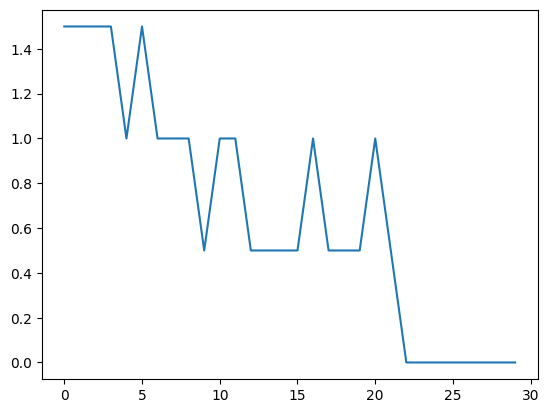

In [125]:
# Create a list of epoch numbers for plotting the training progress.
eps = [e for e in range(epochs)]

# Plot the cost (loss) over the training epochs to visualize the training progress.
plt.plot(eps, cst)

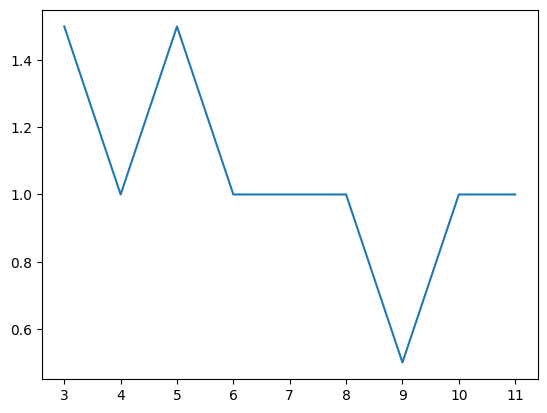

In [126]:
# Plot the cost (loss) for epochs 3 to 12 to examine the training progress in that specific range.
plt.plot(eps[3:12], cst[3:12])

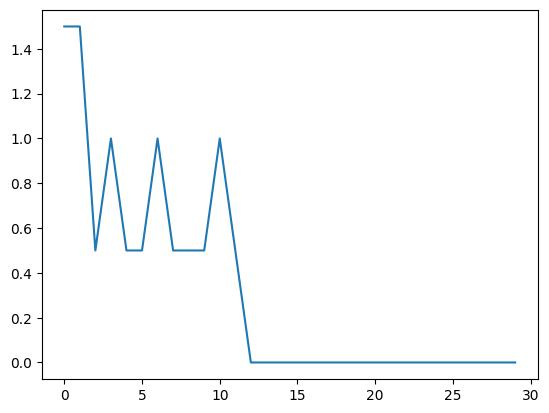

In [127]:
# Try training the perceptron again with an increased learning rate (eta) of 0.3.
p2 = Perceptron(2)  # Create a new Perceptron object with 2 input neurons.
epochs = 30  # Define the number of training epochs.
cst2 = p2.train(inputs, targets_AND, epochs, 0.3)  # Train the perceptron and record the cost.
eps = [e for e in range(epochs)]  # Create a list of epoch numbers for plotting.
plt.plot(eps, cst2)  # Plot the cost (loss) over the training epochs for the new learning rate.

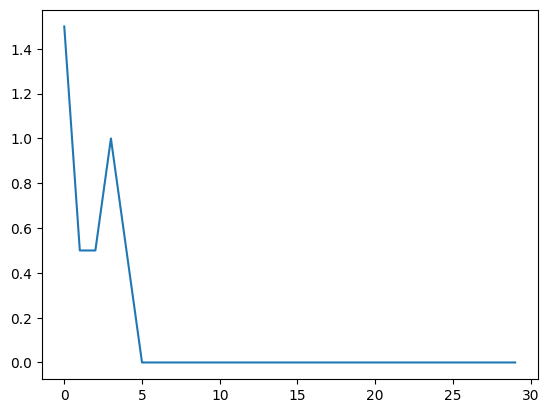

In [128]:
# Try training the perceptron again with an increased learning rate (eta) of 3.0.
p3 = Perceptron(2)  # Create a new Perceptron object with 2 input neurons.
epochs = 30  # Define the number of training epochs.
cst3 = p3.train(inputs, targets_AND, epochs, 3.0)  # Train the perceptron and record the cost.
eps = [e for e in range(epochs)]  # Create a list of epoch numbers for plotting.
plt.plot(eps, cst3)  # Plot the cost (loss) over the training epochs for the new learning rate.

In [129]:
# Exercise 1:  train another perceptron object to act as an OR gate.
# Also experiment with the learning constant eta, trying values 1.0, 0,3 etc. 

targets_OR = np.array([0, 1, 1, 1])  # Desired outputs for OR gate
p_or = Perceptron(2)  # Create a new perceptron with 2 inputs
cst_or = p_or.train(inputs, targets_OR, epochs, 0.1)  # Train the perceptron
print("OR Gate Outputs:", p_or.feedforward(inputs))  # Check the outputs after training

OR Gate Outputs: [0 1 1 1]


In [130]:
# Exercise 2:  train a perceptron with 3 inputs for logical OR. 
# You will have to create a new inputs matrix for this, with 8 rows and 3 columns.

inputs_3d = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1],
                      [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
# Desired outputs for 3-input OR
targets_OR_3d = np.array([0, 1, 1, 1, 1, 1, 1, 1])  
p_or_3d = Perceptron(3)  # Create a new perceptron with 3 inputs
cst_or_3d = p_or_3d.train(inputs_3d, targets_OR_3d, epochs, 0.1)  # Train the perceptron
print("3D OR Gate Outputs:", p_or_3d.feedforward(inputs_3d))  # Check the outputs

3D OR Gate Outputs: [0 1 1 1 1 1 1 1]


In [131]:
# Exercise 3: setup a matrix of training vectors for the cheese festival decision problem and 
# aslo a vector of the desired outputs. Then train a 3-input perceptron for deciding on whether 
# to attend the cheese festival.

inputs_cheese = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1],
                           [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
# Desired outputs indicating whether to attend the festival (1 = attend, 0 = not attend)
targets_cheese = np.array([0, 0, 0, 0, 1, 1, 1, 1])  
p_cheese = Perceptron(3)  # Create a new perceptron with 3 inputs
cst_cheese = p_cheese.train(inputs_cheese, targets_cheese, epochs, 0.1)  # Train the perceptron
print("Cheese Festival Outputs:", p_cheese.feedforward(inputs_cheese))  # Check the outputs

Cheese Festival Outputs: [0 0 0 0 1 1 1 1]


In [132]:
# Exercise 4:  train another perceptron object as an XOR gate. 
# Can you get it to converge?

targets_XOR = np.array([0, 1, 1, 0])  # Desired outputs for XOR
p_xor = Perceptron(2)  # Create a new perceptron with 2 inputs
cst_xor = p_xor.train(inputs, targets_XOR, epochs, 0.1)  # Attempt to train the perceptron
print("XOR Gate Outputs (not expected to work):", p_xor.feedforward(inputs))  # Check the outputs

XOR Gate Outputs (not expected to work): [1 1 1 1]


In [133]:
# Exercise 5: Create a class for SigmoidPerceptron which is nearly identical to class Perceptron
# except that it uses sigmoid(z) as the activation function and you will need to modify the learning
# formula from  del_w = eta * e * x  where e = (y-a) to
# del_w = -eta * delta * x  where  delta = (a-y) * a * (1-a)  
# Note that a * (1-a) is the derivative of sigmoid, where a = sigmoid(z) and z = w.dot(x) + b

# Then try to train a SigmoidPerceptron for AND, OR. Will likely need many more epochs.

class SigmoidPerceptron(Perceptron):
    # Override the feedforward method to use sigmoid activation
    def feedforward(self, xs):
        res = [self.w.dot(x) + self.b for x in xs]  # Compute weighted sum
        return np.array([sigmoid(r) for r in res])  # Apply sigmoid function to the sum
    
    # Override the train method to use sigmoid derivative for weight updates
    def train(self, xs, ys, epochs, eta):
        cost = np.zeros((epochs,), dtype=float)  # Array to store cost for each epoch
        
        for ep in range(epochs):                
            del_w = np.zeros((self.n,), dtype=float)  # Initialize weight updates
            del_b = 0.0  # Initialize bias update
            
            for x, y in zip(xs, ys):  
                z = self.w.dot(x) + self.b  # Compute the weighted sum
                a = sigmoid(z)  # Apply sigmoid activation
                delta = (a - y) * a * (1 - a)  # Calculate delta for weight updates
                
                cost[ep] += 0.5 * (y - a) ** 2  # Calculate the cost for the epoch
                
                del_w += -eta * delta * x  # Update weights
                del_b += -eta * delta  # Update bias
            
            self.w += del_w  # Apply weight updates
            self.b += del_b  # Apply bias update
            
        return cost  # Return cost for plotting

# Train Sigmoid Perceptron for AND and OR
sigmoid_p_and = SigmoidPerceptron(2)  # Create a Sigmoid Perceptron for AND
cst_sigmoid_and = sigmoid_p_and.train(inputs, targets_AND, 1000, 0.1)  # Train it
print("Sigmoid AND Outputs:", sigmoid_p_and.feedforward(inputs))  # Check the outputs

sigmoid_p_or = SigmoidPerceptron(2)  # Create a Sigmoid Perceptron for OR
cst_sigmoid_or = sigmoid_p_or.train(inputs, targets_OR, 1000, 0.1)  # Train it
print("Sigmoid OR Outputs:", sigmoid_p_or.feedforward(inputs))  # Check the outputs


Sigmoid AND Outputs: [0.01867313 0.1971926  0.19668581 0.75964748]
Sigmoid OR Outputs: [0.21565615 0.87341377 0.87064362 0.9941142 ]
